## Data Notes
https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
The link contains more information about the data as well as what each column means.

It should also be noted that the dataset used was last updated on March 22, 2021.

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#with open("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv", 'r') as file:
#    data = file.read()

In [4]:
#data

In [5]:
df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

While this dataframe doesn't look like it at the moment, there is every single day in this dataset. I'm unsure why it's so out of order here and in the csv file since on the CDC's website it was ordered properly. Obviously, the ordering occured on the site after the csv file was created or something. One thing that I need to do is reorganize this dataset so that submission date goes from oldest to newest and it's organized alphabetically by state abbreviation.

In [6]:
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,12/08/2020,OK,205999,171497.0,34502.0,0,0.0,1752,1680.0,72.0,0,0.0,12/09/2020 02:45:40 PM,Agree,Agree
1,08/29/2020,SD,12942,NaN,NaN,425,0.0,167,165.0,2.0,2,0.0,08/30/2020 02:49:52 PM,NaN,Agree
2,11/06/2020,SD,52639,NaN,NaN,1488,73.0,510,476.0,34.0,28,3.0,11/07/2020 02:45:17 PM,NaN,Agree
3,09/21/2020,MP,69,69.0,0.0,0,0.0,2,2.0,0.0,0,0.0,09/22/2020 01:51:57 PM,Agree,Agree
4,06/28/2020,PA,85988,83529.0,2459.0,492,13.0,6614,NaN,NaN,8,4.0,06/29/2020 02:37:31 PM,Agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,02/10/2021,OH,928631,803885.0,124746.0,3281,901.0,11856,10522.0,1334.0,63,9.0,02/11/2021 02:50:55 PM,Agree,Agree
25496,09/05/2020,TN,162362,158070.0,4292.0,1765,93.0,1862,1810.0,52.0,25,0.0,09/06/2020 02:09:04 PM,Agree,Agree
25497,10/19/2020,KS,72968,67935.0,5033.0,2113,179.0,872,NaN,NaN,13,0.0,10/20/2020 02:59:27 PM,Agree,NaN
25498,12/05/2020,NY,368246,NaN,NaN,7532,0.0,10274,NaN,NaN,57,0.0,12/06/2020 02:51:16 PM,Not agree,Not agree


As seen below, we have 8 columns with null values: 
* total confirmed cases
* total probable cases
* number of new probable cases 
* total number of confirmed deaths
* total number of probable deaths
* number of new probable deaths
* consent cases
* consent deaths

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 15 columns):
submission_date    25500 non-null object
state              25500 non-null object
tot_cases          25500 non-null int64
conf_cases         11231 non-null float64
prob_cases         11231 non-null float64
new_case           25500 non-null int64
pnew_case          20459 non-null float64
tot_death          25500 non-null int64
conf_death         11523 non-null float64
prob_death         11523 non-null float64
new_death          25500 non-null int64
pnew_death         20327 non-null float64
created_at         25500 non-null object
consent_cases      20825 non-null object
consent_deaths     21675 non-null object
dtypes: float64(6), int64(4), object(5)
memory usage: 2.9+ MB


In [8]:
df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         14269
prob_cases         14269
new_case               0
pnew_case           5041
tot_death              0
conf_death         13977
prob_death         13977
new_death              0
pnew_death          5173
created_at             0
consent_cases       4675
consent_deaths      3825
dtype: int64

In [9]:
df.isnull().sum().sum()

75206

The .describe() function doesn't seem to help much with this dataset.

In [10]:
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,2.550000e+04,1.123100e+04,11231.000000,25500.000000,20459.000000,25500.000000,11523.000000,11523.000000,25500.000000,20327.000000
mean,1.502621e+05,1.565249e+05,16380.322767,1162.842471,153.519967,3256.180706,3925.602274,429.141630,21.157529,2.242043
std,3.209638e+05,2.093744e+05,31119.590556,2779.316785,1006.807578,6043.666716,5011.503877,911.844126,66.032135,72.927253
min,0.000000e+00,0.000000e+00,0.000000,-33355.000000,-68176.000000,0.000000,0.000000,0.000000,-1824.000000,-5482.000000
25%,6.627500e+02,1.250300e+04,1.000000,2.000000,0.000000,13.000000,407.000000,0.000000,0.000000,0.000000
50%,2.914800e+04,7.452900e+04,2633.000000,279.000000,0.000000,649.000000,1807.000000,103.000000,3.000000,0.000000
75%,1.612300e+05,2.119535e+05,13760.000000,1128.250000,83.000000,3779.000000,5551.500000,336.000000,19.000000,0.000000
max,3.545278e+06,1.221863e+06,202497.000000,71734.000000,68408.000000,56118.000000,25650.000000,5482.000000,4585.000000,5482.000000


As seen below, we weirdly have 60 states.

In [11]:
df['submission_date'].value_counts()

02/16/2020    60
02/12/2021    60
12/24/2020    60
01/24/2021    60
07/18/2020    60
              ..
08/01/2020    60
04/20/2020    60
04/15/2020    60
04/06/2020    60
08/28/2020    60
Name: submission_date, Length: 425, dtype: int64

It's been determined that 10 of these aren't states. Some are actually territories.
* PW is Palau
* FSM is the Federated States of Micronesia
* PR is Puerto Rico
* GU is Guam
* NYC is New York City
* DC is District of Columbia
* RMI is Republic of the Marshall Islands
* MP is Northern Mariana Islands
* VI is Virgin Islands
* LA is Los Angeles 

In [12]:
df['state'].value_counts()

NV     425
CO     425
OH     425
ID     425
DE     425
MO     425
SC     425
AS     425
KY     425
DC     425
OR     425
MS     425
GU     425
UT     425
MP     425
NY     425
IL     425
NE     425
MA     425
MT     425
VA     425
HI     425
NYC    425
AL     425
WY     425
AZ     425
TN     425
MI     425
ND     425
VI     425
WV     425
GA     425
NC     425
FL     425
NM     425
NH     425
CA     425
MD     425
LA     425
VT     425
PA     425
ME     425
CT     425
MN     425
WI     425
NJ     425
KS     425
IA     425
IN     425
OK     425
TX     425
RMI    425
SD     425
WA     425
PW     425
AR     425
FSM    425
AK     425
RI     425
PR     425
Name: state, dtype: int64

In [13]:
df['consent_cases'].value_counts()

Agree        13975
Not agree     6850
Name: consent_cases, dtype: int64

In [14]:
df['consent_deaths'].value_counts()

Agree        14450
Not agree     7225
Name: consent_deaths, dtype: int64

In [15]:
df['tot_cases'].value_counts()

0         3724
1          295
4          181
3          138
2          106
          ... 
96965        1
27713        1
56001        1
119488       1
10019        1
Name: tot_cases, Length: 17643, dtype: int64

In [21]:
df['submission_date'].unique()

array(['2020-12-08T00:00:00.000000000', '2020-08-29T00:00:00.000000000',
       '2020-11-06T00:00:00.000000000', '2020-09-21T00:00:00.000000000',
       '2020-06-28T00:00:00.000000000', '2020-12-02T00:00:00.000000000',
       '2020-05-05T00:00:00.000000000', '2020-08-23T00:00:00.000000000',
       '2020-04-09T00:00:00.000000000', '2020-05-16T00:00:00.000000000',
       '2020-09-08T00:00:00.000000000', '2020-10-19T00:00:00.000000000',
       '2020-05-04T00:00:00.000000000', '2020-07-26T00:00:00.000000000',
       '2020-11-12T00:00:00.000000000', '2020-10-03T00:00:00.000000000',
       '2020-11-21T00:00:00.000000000', '2020-05-21T00:00:00.000000000',
       '2020-11-17T00:00:00.000000000', '2020-11-07T00:00:00.000000000',
       '2020-06-05T00:00:00.000000000', '2020-05-26T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2020-09-15T00:00:00.000000000',
       '2020-04-08T00:00:00.000000000', '2020-11-03T00:00:00.000000000',
       '2021-03-16T00:00:00.000000000', '2021-01-12

In [16]:
df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,12/08/2020,OK,205999,171497.0,34502.0,0,0.0,1752,1680.0,72.0,0,0.0,12/09/2020 02:45:40 PM,Agree,Agree
1,08/29/2020,SD,12942,NaN,NaN,425,0.0,167,165.0,2.0,2,0.0,08/30/2020 02:49:52 PM,NaN,Agree
2,11/06/2020,SD,52639,NaN,NaN,1488,73.0,510,476.0,34.0,28,3.0,11/07/2020 02:45:17 PM,NaN,Agree
3,09/21/2020,MP,69,69.0,0.0,0,0.0,2,2.0,0.0,0,0.0,09/22/2020 01:51:57 PM,Agree,Agree
4,06/28/2020,PA,85988,83529.0,2459.0,492,13.0,6614,NaN,NaN,8,4.0,06/29/2020 02:37:31 PM,Agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,02/10/2021,OH,928631,803885.0,124746.0,3281,901.0,11856,10522.0,1334.0,63,9.0,02/11/2021 02:50:55 PM,Agree,Agree
25496,09/05/2020,TN,162362,158070.0,4292.0,1765,93.0,1862,1810.0,52.0,25,0.0,09/06/2020 02:09:04 PM,Agree,Agree
25497,10/19/2020,KS,72968,67935.0,5033.0,2113,179.0,872,NaN,NaN,13,0.0,10/20/2020 02:59:27 PM,Agree,NaN
25498,12/05/2020,NY,368246,NaN,NaN,7532,0.0,10274,NaN,NaN,57,0.0,12/06/2020 02:51:16 PM,Not agree,Not agree


In [22]:
df['submission_date'] = pd.to_datetime(df.submission_date)
df_sorted = df.sort_values(by = ['submission_date'])

In [23]:
df_sorted

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
2338,2020-01-22,AK,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
17412,2020-01-22,NH,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
8795,2020-01-22,VI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
2703,2020-01-22,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
14348,2020-01-22,NJ,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19728,2021-03-21,ID,177420,142852.0,34568.0,0,0.0,1941,1694.0,247.0,0,0.0,03/22/2021 01:57:09 PM,Agree,Agree
11872,2021-03-21,FSM,1,1.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/22/2021 01:57:09 PM,Agree,Agree
5008,2021-03-21,NM,189731,NaN,NaN,171,0.0,3889,NaN,NaN,0,0.0,03/22/2021 01:57:09 PM,NaN,Not agree
17674,2021-03-21,IL,1221863,1221863.0,0.0,1431,0.0,23357,21081.0,2276.0,28,6.0,03/22/2021 01:57:09 PM,Agree,Agree


In [19]:
df_IL = df_sorted[df_sorted['state'] == 'IL']
df_IL

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
16569,2020-01-22,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
18889,2020-01-23,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
8766,2020-01-24,IL,1,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
14147,2020-01-25,IL,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
12484,2020-01-26,IL,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7497,2021-03-17,IL,1213765,1213765.0,0.0,1655,0.0,23255,20988.0,2267.0,20,5.0,03/18/2021 02:01:55 PM,Agree,Agree
5667,2021-03-18,IL,1216090,1216090.0,0.0,2325,0.0,23287,21022.0,2265.0,32,-2.0,03/19/2021 02:25:43 PM,Agree,Agree
16556,2021-03-19,IL,1218470,1218470.0,0.0,2380,0.0,23304,21034.0,2270.0,17,5.0,03/20/2021 02:03:21 PM,Agree,Agree
13134,2021-03-20,IL,1220432,1220432.0,0.0,1962,0.0,23329,21059.0,2270.0,25,0.0,03/21/2021 01:54:01 PM,Agree,Agree


In [25]:
df_IL_2019 = df_IL[df_IL['submission_date'] < '2021-01-01']
df_IL_2019

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
16569,2020-01-22,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
18889,2020-01-23,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
8766,2020-01-24,IL,1,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
14147,2020-01-25,IL,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
12484,2020-01-26,IL,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18207,2020-12-27,IL,937909,937909.0,0.0,3767,0.0,17336,15969.0,1367.0,112,8.0,12/28/2020 02:42:49 PM,Agree,Agree
12669,2020-12-28,IL,942362,942362.0,0.0,4453,0.0,17470,16074.0,1396.0,134,29.0,12/29/2020 02:56:32 PM,Agree,Agree
6999,2020-12-29,IL,948006,948006.0,0.0,5644,0.0,17596,16179.0,1417.0,126,21.0,12/30/2020 02:56:20 PM,Agree,Agree
7970,2020-12-30,IL,955380,955380.0,0.0,7374,0.0,17811,16357.0,1454.0,215,37.0,12/31/2020 02:55:07 PM,Agree,Agree


In [40]:
df_IL_2019['tot_cases'].value_counts()

2         30
1          7
32         3
4          3
0          2
          ..
124759     1
597849     1
343390     1
63840      1
131327     1
Name: tot_cases, Length: 303, dtype: int64

In [41]:
df_IL_2019['tot_cases'].unique()

array([     0,      1,      2,      3,      4,      5,      6,      7,
           11,     19,     27,     32,     93,    105,    160,    288,
          422,    585,    753,   1049,   1285,   1535,   1865,   2538,
         3026,   3491,   4596,   5057,   5994,   6980,   7695,   8904,
        10357,  11256,  12262,  13549,  15078,  16422,  17887,  19180,
        20852,  22025,  23247,  24593,  25733,  27575,  29160,  30357,
        31508,  33059,  35108,  36934,  39658,  41777,  43903,  45883,
        48102,  50355,  52918,  56055,  58505,  61449,  63840,  65962,
        68232,  70873,  73760,  76085,  77741,  79007,  83021,  84698,
        87937,  90369,  92457,  94191,  96485,  98030, 100418, 102686,
       105444, 107796, 110304, 112017, 113195, 114306, 115833, 117455,
       118917, 120260, 121234, 122848, 123830, 124759, 125915, 126890,
       127757, 129139, 129936, 130561, 131327, 132059, 132732, 133404,
       133877, 134500, 135046, 135639, 136470, 137104, 137762, 138224,
      

In [46]:
df_IL_2019_in = df_IL_2019.reset_index(drop=True)
df_IL_2019_in

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2020-01-22,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,2020-01-23,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,2020-01-24,IL,1,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,2020-01-25,IL,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,2020-01-26,IL,1,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2020-12-27,IL,937909,937909.0,0.0,3767,0.0,17336,15969.0,1367.0,112,8.0,12/28/2020 02:42:49 PM,Agree,Agree
341,2020-12-28,IL,942362,942362.0,0.0,4453,0.0,17470,16074.0,1396.0,134,29.0,12/29/2020 02:56:32 PM,Agree,Agree
342,2020-12-29,IL,948006,948006.0,0.0,5644,0.0,17596,16179.0,1417.0,126,21.0,12/30/2020 02:56:20 PM,Agree,Agree
343,2020-12-30,IL,955380,955380.0,0.0,7374,0.0,17811,16357.0,1454.0,215,37.0,12/31/2020 02:55:07 PM,Agree,Agree


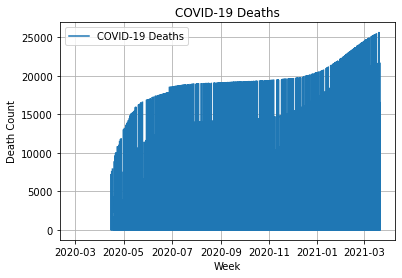

<Figure size 720x360 with 0 Axes>

In [50]:
plt.plot(df_sorted['submission_date'], df_sorted['conf_death'], label = 'COVID-19 Deaths')
#plt.plot(df['End Date'], df['Pneumonia Deaths'], marker = 'o', label = 'Pneumonia Deaths')
#plt.plot(df['End Date'], df['Influenza Deaths'], marker = 'o', label = 'Influenza Deaths')
plt.xlabel('Week')
plt.ylabel('Death Count')
plt.title('COVID-19 Deaths')
plt.grid(True)
plt.legend()
plt.figure(figsize = (10, 5))

#plt.savefig('IL_unemployment_comparison_2019-2020.png', dpi=300, bbox_inches='tight')
plt.show()

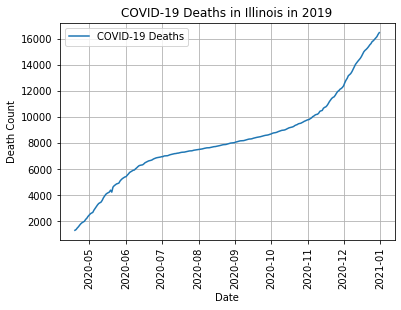

<Figure size 720x360 with 0 Axes>

In [33]:
plt.plot(df_IL_2019['submission_date'], df_IL_2019['conf_death'], label = 'COVID-19 Deaths')
#plt.plot(df['End Date'], df['Pneumonia Deaths'], marker = 'o', label = 'Pneumonia Deaths')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Death Count')
plt.title('COVID-19 Deaths in Illinois in 2019')
plt.grid(True)
plt.legend()
plt.figure(figsize = (10, 5))

#plt.savefig('IL_unemployment_comparison_2019-2020.png', dpi=300, bbox_inches='tight')
plt.show()

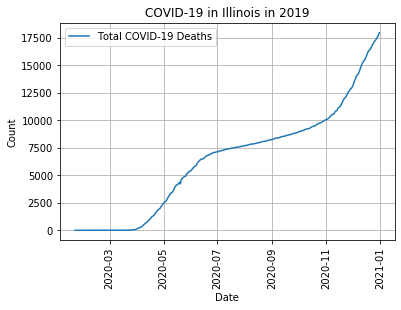

<Figure size 720x360 with 0 Axes>

In [50]:
# This is the graph to use

plt.plot(df_IL_2019['submission_date'], df_IL_2019['tot_death'], label = 'Total COVID-19 Deaths')
#plt.plot(df['submission_date'], df_IL_2019['tot_cases'], label = 'Total Cases')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('COVID-19 in Illinois in 2019')
plt.grid(True)
plt.legend()
plt.figure(figsize = (10, 5))

#plt.savefig('IL_unemployment_comparison_2019-2020.png', dpi=300, bbox_inches='tight')
plt.show()

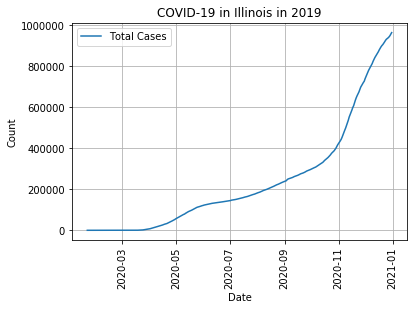

<Figure size 720x360 with 0 Axes>

In [51]:
#plt.plot(df_IL_2019['submission_date'], df_IL_2019['tot_death'], label = 'Total COVID-19 Deaths')
plt.plot(df_IL_2019['submission_date'], df_IL_2019['tot_cases'], label = 'Total Cases')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('COVID-19 in Illinois in 2019')
plt.grid(True)
plt.legend()
plt.figure(figsize = (10, 5))

#plt.savefig('IL_unemployment_comparison_2019-2020.png', dpi=300, bbox_inches='tight')
plt.show()

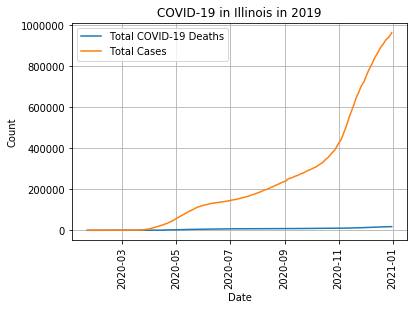

<Figure size 720x360 with 0 Axes>

In [52]:
# This is the graph to use

plt.plot(df_IL_2019['submission_date'], df_IL_2019['tot_death'], label = 'Total COVID-19 Deaths')
plt.plot(df_IL_2019['submission_date'], df_IL_2019['tot_cases'], label = 'Total Cases')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('COVID-19 in Illinois in 2019')
plt.grid(True)
plt.legend()
plt.figure(figsize = (10, 5))

#plt.savefig('IL_unemployment_comparison_2019-2020.png', dpi=300, bbox_inches='tight')
plt.show()

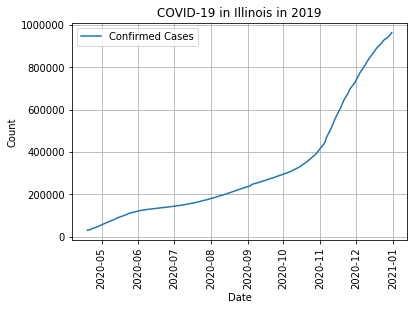

<Figure size 720x360 with 0 Axes>

In [54]:
plt.plot(df_IL_2019['submission_date'], df_IL_2019['conf_cases'], label = 'Confirmed Cases')
#plt.plot(df_IL_2019['submission_date'], df_IL_2019['tot_cases'], label = 'Total Cases')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('COVID-19 in Illinois in 2019')
plt.grid(True)
plt.legend()
plt.figure(figsize = (10, 5))

#plt.savefig('IL_unemployment_comparison_2019-2020.png', dpi=300, bbox_inches='tight')
plt.show()